### Permutation Test

- Setup: We have two samples $A$ and $B$, each of size $n$. Let $\bar{A}$ and $\bar{B}$ be their sample means.

- Observed Statistic: $T_{\text{obs}} = \bar{A} - \bar{B}$.

- Permutation Procedure:
  1. Combine both groups into a pooled set of $2n$ observations.
  2. Shuffle (permute) these $2n$ observations many times.
  3. Re-split each shuffled set into two new groups of size $n$, compute $T^* = \bar{A}^* - \bar{B}^*$ for each permutation.

- p-value: 
  $$
  p = \frac{\sum_{j=1}^{N}\mathbf{1}\left( \lvert T^*_j \rvert \ge \lvert T_{\text{obs}} \rvert \right)}{N},
  $$
  where $N$ is the number of permutations.

- Interpretation: If $p < \alpha$, reject $H_0$ (no difference) in favor of a real treatment effect.

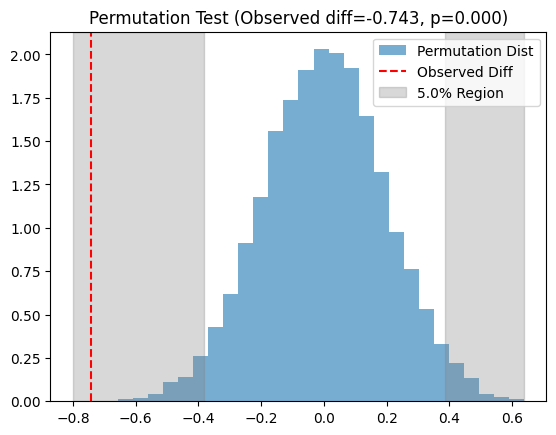

Observed difference in means: -0.743
Permutation p-value: 0.000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_data_new_drug(n=50, effect=0.5):
    np.random.seed(42)
    control   = np.random.normal(loc=0,     scale=1, size=n)
    treatment = np.random.normal(loc=effect, scale=1, size=n)
    return control, treatment

def permutation_test(A, B, num_permutations=10_000, alpha=0.05, plot=True):
    observed_diff = np.mean(A) - np.mean(B)
    pooled = np.concatenate([A, B])
    diffs = []
    for _ in range(num_permutations):
        shuffled = np.random.permutation(pooled)
        A_star = shuffled[:len(A)]
        B_star = shuffled[len(A):]
        diffs.append(np.mean(A_star) - np.mean(B_star))
    diffs = np.array(diffs)

    # Two-sided p-value
    p_value = np.mean(np.abs(diffs) >= abs(observed_diff))

    if plot:
        plt.hist(diffs, bins=30, alpha=0.6, density=True, label="Permutation Dist")
        plt.axvline(observed_diff, color='r', linestyle='--', label="Observed Diff")
        # Mark alpha regions
        low_crit  = np.percentile(diffs, 100 * alpha/2)
        high_crit = np.percentile(diffs, 100 * (1 - alpha/2))
        plt.axvspan(xmin=min(diffs), xmax=low_crit,  color='gray', alpha=0.3, label=f"{alpha*100:.1f}% Region")
        plt.axvspan(xmin=high_crit, xmax=max(diffs), color='gray', alpha=0.3)
        plt.title(f"Permutation Test (Observed diff={observed_diff:.3f}, p={p_value:.3f})")
        plt.legend()
        plt.show()

    return observed_diff, p_value

if __name__ == "__main__":
    # Simulate control vs. treatment
    A, B = simulate_data_new_drug(n=50, effect=0.5)
    obs_diff, p_val = permutation_test(A, B, num_permutations=10_000, alpha=0.05, plot=True)
    print(f"Observed difference in means: {obs_diff:.3f}")
    print(f"Permutation p-value: {p_val:.3f}")
